In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2,VGG16, VGG19
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
import tensorflow as tf
import imutils
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB7
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import LeakyReLU
from imutils import paths
import random
import cv2
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import numpy as np
import argparse
import shutil
import os

C:\Users\Harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\Harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of Tens

In [6]:
current_dir = os.getcwd()
trainpath = os.path.abspath(os.path.join(current_dir, '..', 'DATA', 'Dataset'))

print(f"Train path: {trainpath}")


Train path: C:\Users\Harsh\Downloads\data_science01\dl_projects\task 3\DATA\Dataset


In [7]:
totalTrain = len(list(paths.list_images(trainpath)))
# totalTest = len(list(paths.list_images(testpath)))
print(totalTrain)
# print(totalTest)

9097


In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(trainpath)))
random.seed(42)
random.shuffle(imagePaths)

# Initialize label encoder
label_encoder = LabelEncoder()

# Progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # Loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # Load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (224, 224))
        image = img_to_array(image)
        data.append(image)

        # Extract the class label from the image path and update the labels list
        label = imagePath.split(os.path.sep)[-2]
        labels.append(label)
        
        # Update the progress bar
        pbar.update(1)

[INFO] loading images...


C:\Users\Harsh\AppData\Local\Temp\ipykernel_4312\3949168591.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm(total=len(imagePaths)) as pbar:


  0%|          | 0/9097 [00:00<?, ?it/s]

In [5]:
labels

['6-20',
 '25-30',
 '6-20',
 '42-48',
 '25-30',
 '25-30',
 '60-98',
 '42-48',
 '25-30',
 '25-30',
 '60-98',
 '25-30',
 '25-30',
 '60-98',
 '60-98',
 '60-98',
 '60-98',
 '25-30',
 '60-98',
 '42-48',
 '25-30',
 '42-48',
 '6-20',
 '60-98',
 '42-48',
 '60-98',
 '25-30',
 '25-30',
 '25-30',
 '6-20',
 '6-20',
 '25-30',
 '25-30',
 '6-20',
 '60-98',
 '6-20',
 '42-48',
 '60-98',
 '25-30',
 '25-30',
 '60-98',
 '6-20',
 '60-98',
 '60-98',
 '6-20',
 '60-98',
 '25-30',
 '60-98',
 '60-98',
 '25-30',
 '25-30',
 '60-98',
 '6-20',
 '25-30',
 '60-98',
 '60-98',
 '42-48',
 '6-20',
 '6-20',
 '25-30',
 '60-98',
 '25-30',
 '6-20',
 '42-48',
 '42-48',
 '6-20',
 '25-30',
 '6-20',
 '60-98',
 '60-98',
 '60-98',
 '25-30',
 '25-30',
 '60-98',
 '25-30',
 '60-98',
 '42-48',
 '60-98',
 '6-20',
 '25-30',
 '42-48',
 '25-30',
 '60-98',
 '60-98',
 '25-30',
 '6-20',
 '42-48',
 '25-30',
 '25-30',
 '60-98',
 '25-30',
 '6-20',
 '60-98',
 '60-98',
 '60-98',
 '6-20',
 '6-20',
 '6-20',
 '6-20',
 '6-20',
 '60-98',
 '60-98',
 '6

In [6]:
 # Perform label encoding on the labels list
labels = label_encoder.fit_transform(labels)

In [7]:
labels

array([2, 0, 2, ..., 2, 0, 0], dtype=int64)

In [8]:
unique_labels = set(labels)
num_labels = len(unique_labels)
print("Number of unique labels:", num_labels)

Number of unique labels: 4


In [9]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [10]:
labels=labels.astype(float)

In [11]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, random_state=42)

In [12]:
trainX=np.array(trainX)
print(trainX.shape)

(7277, 224, 224, 3)


In [13]:
testX=np.array(testX)
print(testX.shape)

(1820, 224, 224, 3)


In [14]:
trainY=np.array(trainY)
print(trainY.shape)

(7277,)


In [15]:
testY=np.array(testY)
print(testY.shape)

(1820,)


In [16]:
trainY = to_categorical(trainY, num_classes=4)
testY = to_categorical(testY, num_classes=4)

In [18]:
print(trainY)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [19]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, 
                         width_shift_range=0.1, 
                         height_shift_range=0.1, 
                         shear_range=0.2, 
                         zoom_range=0.2, 
                         horizontal_flip=True, 
                         fill_mode="nearest")

In [23]:
# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False,
                  input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(20, activation="relu")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
headModel = Dense(4, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
vgg_model = Model(inputs=baseModel.input, outputs=headModel)

In [24]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

In [25]:
# compile our model (this needs to be done after our setting our
# layers to being non-trainable
print("[INFO] compiling model...")
opt = SGD(learning_rate=1e-3, momentum=0.9)
vgg_model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])

[INFO] compiling model...


In [26]:
# train the network
print("[INFO] training network...")
H = vgg_model.fit(x=aug.flow(trainX, trainY, batch_size=64),
              validation_data=(testX, testY), 
              steps_per_epoch=len(trainX) // 64,
              epochs=30, 
              verbose=1)


[INFO] training network...
Epoch 1/30


113/113 [==============================] - 617s 5s/step - loss: 1.1247 - accuracy: 0.5113 - val_loss: 0.9250 - val_accuracy: 0.6011
Epoch 2/30
113/113 [==============================] - 597s 5s/step - loss: 0.9688 - accuracy: 0.5845 - val_loss: 0.9073 - val_accuracy: 0.6077
Epoch 3/30
113/113 [==============================] - 593s 5s/step - loss: 0.9189 - accuracy: 0.6093 - val_loss: 0.8931 - val_accuracy: 0.6148
Epoch 4/30
113/113 [==============================] - 596s 5s/step - loss: 0.9312 - accuracy: 0.6009 - val_loss: 0.8288 - val_accuracy: 0.6363
Epoch 5/30
113/113 [==============================] - 594s 5s/step - loss: 0.8828 - accuracy: 0.6187 - val_loss: 0.9040 - val_accuracy: 0.6115
Epoch 6/30
113/113 [==============================] - 596s 5s/step - loss: 0.8956 - accuracy: 0.6068 - val_loss: 0.9140 - val_accuracy: 0.6033
Epoch 7/30
113/113 [==============================] - 597s 5s/step - loss: 0.8492 - accuracy: 0.6344 - val_loss: 

In [31]:
vgg_model.save("vgg_model_age_detection.h5")

C:\Users\Harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
def plot_acc(H, N, plotPath=None): 

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower left")
   

def plot_loss(H, N, plotPath=None):
    
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")

    plt.title("Training Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(loc="lower left")

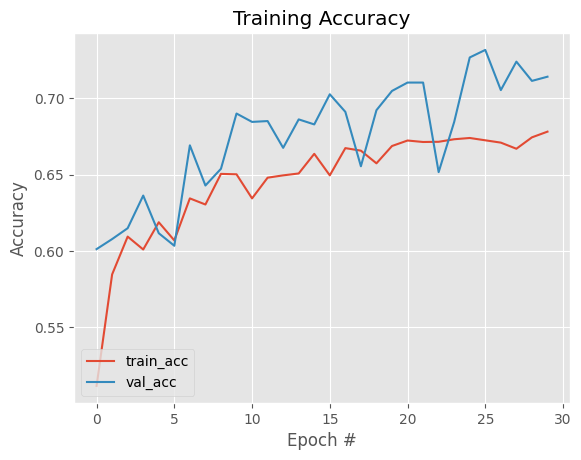

In [29]:
plot_acc(H,30)

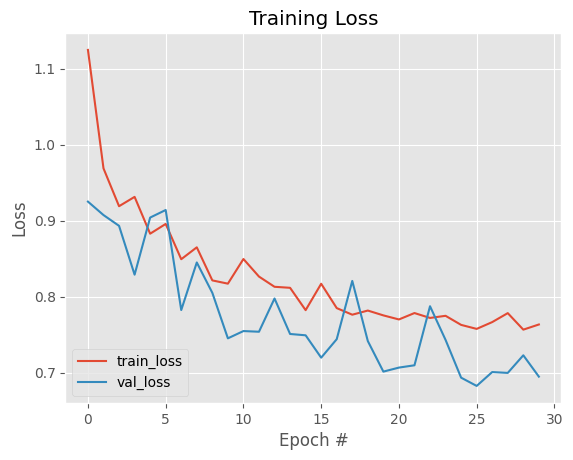

In [30]:
plot_loss(H,30)